## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [2]:
# packages import
import requests
import json
import pandas as pd


Login to api

In [3]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [4]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,6079a807d131ef46643cff2b.501d1892c785d7431c11f...


get devices data

In [5]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [6]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '607906bc4568aa5ea543c9e0', 'keys': [...",[],[],"{'_id': '607906bc4568aa5ea543c9e0', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '6079a0b9d131ef46643c3272', 'keys': [...",[],[],"{'_id': '6079a0b9d131ef46643c3272', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '60793e43100aad2989c9ebba', 'keys': [...",[],[],"{'_id': '60793e43100aad2989c9ebba', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '6079a0c11ef743213d9aa8f8', 'keys': [...",[],[],"{'_id': '6079a0c11ef743213d9aa8f8', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '6079a0e61ef743213d9aac8a', 'keys': [...",[],[],"{'_id': '6079a0e61ef743213d9aac8a', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '6079a0d31ef743213d9aaa87', 'keys': [...",[],[],"{'_id': '6079a0d31ef743213d9aaa87', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


## Sensordaten einlesen

In [7]:
%%time
message_data_combined = pd.DataFrame()

for deviceid in device_data['id'].items():
  deviceid = deviceid[1]
  url = "https://www.iofrog.com/api/v2/devices/" + deviceid + "/messages?timestampFrom=1616601600&limit=5000"

  # payload = json.dumps({
  #   "data": [
  #     {
  #       "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
  #       "isAlarm": False,
  #       "isDismissed": False,
  #       "timestamp": 1584093653,
  #       "type": "data_uplink",
  #       "seqNumber": 1,
  #       "keys": [
  #         {
  #           "isCode": False,
  #           "_id": "1111111111111111111111",
  #           "key": "key",
  #           "value": "value",
  #           "keyLocale": "Klíč",
  #           "valueLocale": "Hodnota",
  #           "color": "alarm",
  #           "icon": "icon name (from fontAwesome)"
  #         }
  #       ]
  #     }
  #   ],
  #   "count": 1
  # })
  headers = {
    'Authorization': 'Bearer ' + access_token,
    'Content-Type': 'application/json',
    'Cookie': ''
  }
  message_response = requests.request("GET", url, headers=headers)
  # print(response.text)
  message_dict = json.loads(message_response.text)
  # json response to dataframe
  if 'code' in message_dict:
    print("Error reading sensor messages from device: " + deviceid)
    print(message_dict)
  else:
    message_data = pd.DataFrame.from_dict(message_dict['data'])
    message_data = message_data.drop(columns=['keys'])
    message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
    message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
    message_data_keys.reset_index(inplace=True)
    message_data_keys = message_data_keys.groupby('_id').sum()
    #print(message_data_keys)
    # join df's
    message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
    message_data_combined = pd.concat([message_data_combined, message_data])

message_data_combined

Wall time: 7.63 s


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607906bc4568aa5ea543c9e0,1618544314,data_bidir,143.0,2203AF9,2021-04-16T03:38:36.137Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,607895968227aa5e8573d5e6,1618515349,data_bidir,142.0,2203AF9,2021-04-15T19:35:50.070Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6078954a8227aa5e8573d226,1618515273,data_bidir,141.0,2203AF9,2021-04-15T19:34:34.269Z,0,heartbeat_2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,607824844568aa5ea52ea8ba,1618486404,data_bidir,140.0,2203AF9,2021-04-15T11:33:24.725Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6077e6ce4a4e60184af43e28,1618470605,data_bidir,139.0,2203AF9,2021-04-15T07:10:06.889Z,0,reed_counter,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,605b7844f4e46133dc9f0885,1616607298,data_bidir,153.0,2203ACB,2021-03-24T17:35:00.665Z,0,reed_counter,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,605b7262f4e46133dc9eae68,1616605778,data_bidir,152.0,2203ACB,2021-03-24T17:09:54.843Z,0,reed_counter,0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,605b6b38f4e46133dc9e40bf,1616603959,data_bidir,151.0,2203ACB,2021-03-24T16:39:20.359Z,0,reed_counter,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,605b67ab7746444305bd79a8,1616603049,data_bidir,150.0,2203ACB,2021-03-24T16:24:11.052Z,0,reed_counter,0,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datetime string zu Datetime Objekten konvertieren

In [8]:
message_data_combined["created"] = pd.to_datetime(message_data_combined["created"])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607906bc4568aa5ea543c9e0,1618544314,data_bidir,143.0,2203AF9,2021-04-16 03:38:36.137000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,607895968227aa5e8573d5e6,1618515349,data_bidir,142.0,2203AF9,2021-04-15 19:35:50.070000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6078954a8227aa5e8573d226,1618515273,data_bidir,141.0,2203AF9,2021-04-15 19:34:34.269000+00:00,0,heartbeat_2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,607824844568aa5ea52ea8ba,1618486404,data_bidir,140.0,2203AF9,2021-04-15 11:33:24.725000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6077e6ce4a4e60184af43e28,1618470605,data_bidir,139.0,2203AF9,2021-04-15 07:10:06.889000+00:00,0,reed_counter,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,605b7844f4e46133dc9f0885,1616607298,data_bidir,153.0,2203ACB,2021-03-24 17:35:00.665000+00:00,0,reed_counter,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,605b7262f4e46133dc9eae68,1616605778,data_bidir,152.0,2203ACB,2021-03-24 17:09:54.843000+00:00,0,reed_counter,0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,605b6b38f4e46133dc9e40bf,1616603959,data_bidir,151.0,2203ACB,2021-03-24 16:39:20.359000+00:00,0,reed_counter,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,605b67ab7746444305bd79a8,1616603049,data_bidir,150.0,2203ACB,2021-03-24 16:24:11.052000+00:00,0,reed_counter,0,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])

### Only use sensors in reed counter mode

In [10]:
# message_data_rc = message_data_combined[message_data_combined['action'] == 'reed_counter']
message_data_combined.sort_values(by=['deviceId', 'created'], inplace=True)
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
1285,605b6426f4e46133dc9dd098,1616602127,data_bidir,564.0,1F25047,2021-03-24 16:09:10.882000+00:00,0,first_move,0,NaN,...,NaN,0,0,0,0,0,0,0,0,0
1284,605b645b7746444305bd442a,1616602195,data_bidir,565.0,1F25047,2021-03-24 16:10:03.512000+00:00,0,orientation_changed,0,NaN,...,NaN,32,32,16,960,976,960,32,32,16
1283,605b646b7746444305bd4543,1616602212,data_bidir,566.0,1F25047,2021-03-24 16:10:19.624000+00:00,0,first_move,0,NaN,...,NaN,0,0,0,0,0,0,0,0,0
1282,605b64ac7746444305bd4a12,1616602281,data_bidir,567.0,1F25047,2021-03-24 16:11:24.607000+00:00,0,orientation_changed,0,NaN,...,NaN,912,928,912,432,448,416,32,32,0
1281,605b66f87746444305bd6e2f,1616602864,data_bidir,568.0,1F25047,2021-03-24 16:21:12.376000+00:00,0,end_of_orientation_alarm,0,NaN,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,6077e8c34568aa5ea5214efc,1618471106,data_bidir,308.0,2203AFA,2021-04-15 07:18:27.529000+00:00,0,heartbeat_2,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60785a5c8227aa5e856e3bc7,1618500185,data_bidir,309.0,2203AFA,2021-04-15 15:23:08.274000+00:00,0,heartbeat_2,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60785a8f4568aa5ea53894ed,1618500238,data_bidir,310.0,2203AFA,2021-04-15 15:23:59.505000+00:00,0,heartbeat_1,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6078cc0a8227aa5e8576d5b8,1618529289,data_bidir,311.0,2203AFA,2021-04-15 23:28:10.650000+00:00,0,heartbeat_2,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Generate differential values from counter, fill 0 with old values

In [11]:
message_data_rc['counter_new'] = message_data_combined..loc['counter'].diff().shift(-1)

for deviceId in message_data_rc['deviceId'].unique():
    # replace nas with previous values
    message_data_rc.loc[message_data_rc['deviceId'] == deviceid, 'counter'].fillna(method='ffill')  # replace(to_replace=0, method='ffill')
    try:
        # set first value of every sensor to 0, otherwise it will contain a negative value
        message_data_rc.loc[message_data_rc['deviceId'] == deviceId, 'counter_new'][0] = 0
    except:
        pass


print(message_data_rc['counter_new'].isna().sum())
message_data_rc

SyntaxError: invalid syntax (<ipython-input-11-d7dee984d0c6>, line 1)

### Pivot counter column for each sensor

In [11]:
message_data_counters = message_data_rc.pivot(index=['created'], columns='deviceId', values='counter').reset_index().add_prefix('counter_')
message_data_counters.rename(columns={'counter_created':'created', 'counter_deviceId':'deviceId'}, inplace = True)
message_data_counters_new = message_data_rc.pivot(index=['created'], columns='deviceId', values='counter_new').reset_index().add_prefix('counter_new_')
message_data_counters_new.rename(columns={'counter_new_created':'created'}, inplace = True)
# merge with counter new columns
message_data_counters = pd.merge(message_data_counters, message_data_counters_new, how='outer', on=['created'])
message_data_counters.columns.name = None

message_data_counters

,created,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_new_2203AAB,counter_new_2203ACB,counter_new_2203AF9
0,2021-03-24 16:09:49.988000+00:00,NaN,57.0,NaN,NaN,2.0,NaN
1,2021-03-24 16:24:11.052000+00:00,NaN,59.0,NaN,NaN,1.0,NaN
2,2021-03-24 16:39:20.359000+00:00,NaN,60.0,NaN,NaN,3.0,NaN
3,2021-03-24 17:09:54.843000+00:00,NaN,63.0,NaN,NaN,1.0,NaN
4,2021-03-24 17:35:00.665000+00:00,NaN,64.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...
970,2021-04-16 12:08:17.263000+00:00,919.0,NaN,NaN,1.0,NaN,NaN
971,2021-04-16 12:09:10.050000+00:00,NaN,375.0,NaN,NaN,-373.0,NaN
972,2021-04-16 12:10:20.803000+00:00,920.0,NaN,NaN,1.0,NaN,NaN
973,2021-04-16 12:31:50.784000+00:00,921.0,NaN,NaN,1.0,NaN,NaN


## Visualize commulative data

<AxesSubplot:xlabel='created'>

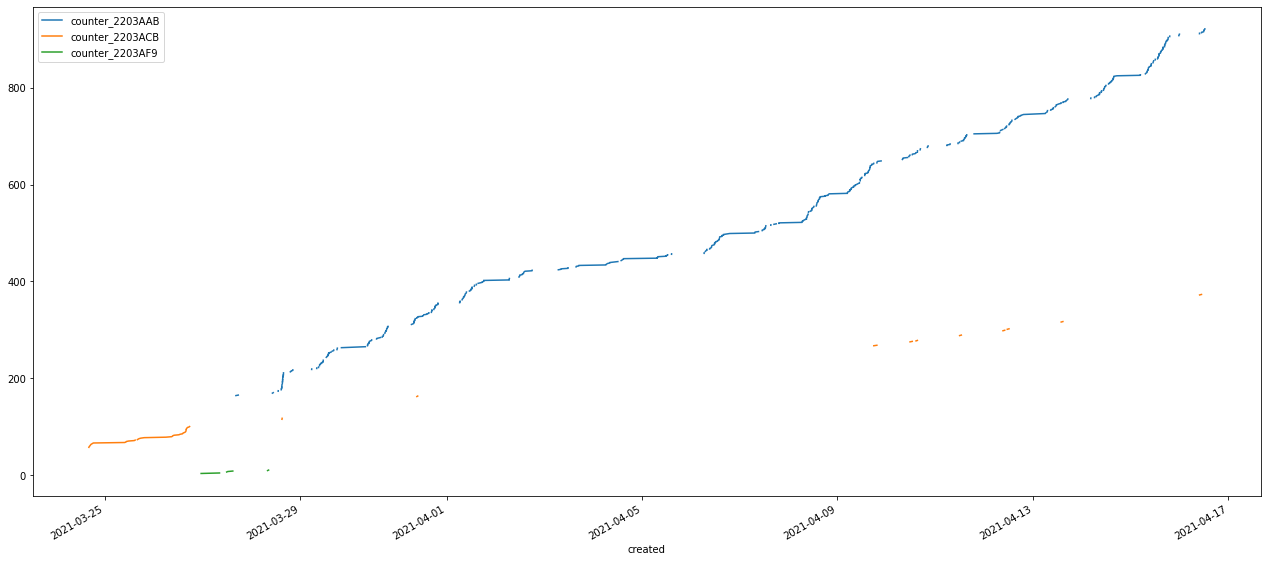

In [20]:
message_data_counters.iloc[:, 0:4].plot(x="created", figsize = (22, 10))
# for column in message_data_counters.columns:
#     if column != 'created':
#         message_data_counters[message_data_counters[column].notnull()].plot(x="created", y=column, figsize = (22,5))


---
## Spielwiese

## google drive api (testing still)

In [13]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [14]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [15]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')
    print(file1)

unsupported file
GoogleDriveFile({'kind': 'drive#file', 'id': '1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'etag': '"MTYxNjc3NDQ0MTgxNA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'alternateLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/edit?usp=drivesdk', 'embedLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/preview?ouid=115354251365952521942', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.document', 'thumbnailLink': 'https://docs.google.com/feeds/vt?gd=true&id=1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA&v=1&s=AMedNnoAAAAAYHmn8w_fSqMPOeekA7KPOscof49ggOHX&sz=s220', 'title': 'Unbenanntes Dokument', 'mimeType': 'application/vnd.google-apps.document', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'creat

In [16]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']
